In [1]:
# Librerías para manipulación de datos
import numpy as np
import pandas as pd

# Librerías para visualización
import matplotlib.pyplot as plt
import seaborn as sns

# Librerías para Machine Learning
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

# Modelos de Machine Learning
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

# Evaluación de modelos
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [3]:
# Cargar los datos desde el archivo CSV
data = pd.read_csv('/content/Bank_Marketing_Dataset_TF.csv')  # Reemplazar si es necesario

# Mostrar las primeras filas del dataset para entender su estructura
print("Primeras 5 filas del dataset:")
data.head()


Primeras 5 filas del dataset:


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59.0,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56.0,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41.0,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55.0,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54.0,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [4]:
# Mostrar información sobre el dataset
print("\nInformación del dataset:")
data.info()

# Mostrar estadísticas descriptivas
print("\nEstadísticas descriptivas:")
data.describe()

# Verificar si hay valores nulos
print("\nValores nulos por columna:")
data.isnull().sum()



Información del dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        10828 non-null  float64
 1   job        10046 non-null  object 
 2   marital    10604 non-null  object 
 3   education  11162 non-null  object 
 4   default    11162 non-null  object 
 5   balance    11162 non-null  int64  
 6   housing    11162 non-null  object 
 7   loan       11162 non-null  object 
 8   contact    11162 non-null  object 
 9   day        11162 non-null  int64  
 10  month      11162 non-null  object 
 11  duration   11162 non-null  int64  
 12  campaign   11162 non-null  int64  
 13  pdays      11162 non-null  int64  
 14  previous   11162 non-null  int64  
 15  poutcome   11162 non-null  object 
 16  deposit    11162 non-null  object 
dtypes: float64(1), int64(6), object(10)
memory usage: 1.4+ MB

Estadísticas descriptivas:

Valores nulos

,0
age,334
job,1116
marital,558
education,0
default,0
balance,0
housing,0
loan,0
contact,0
day,0


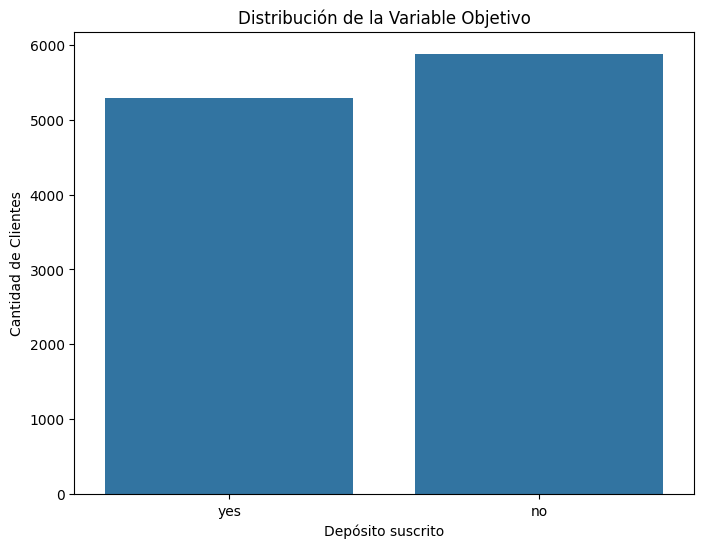

In [5]:
# Gráfico de conteo de la variable objetivo (por ejemplo, 'deposit')
plt.figure(figsize=(8, 6))
sns.countplot(x='deposit', data=data)
plt.title('Distribución de la Variable Objetivo')
plt.xlabel('Depósito suscrito')
plt.ylabel('Cantidad de Clientes')
plt.show()

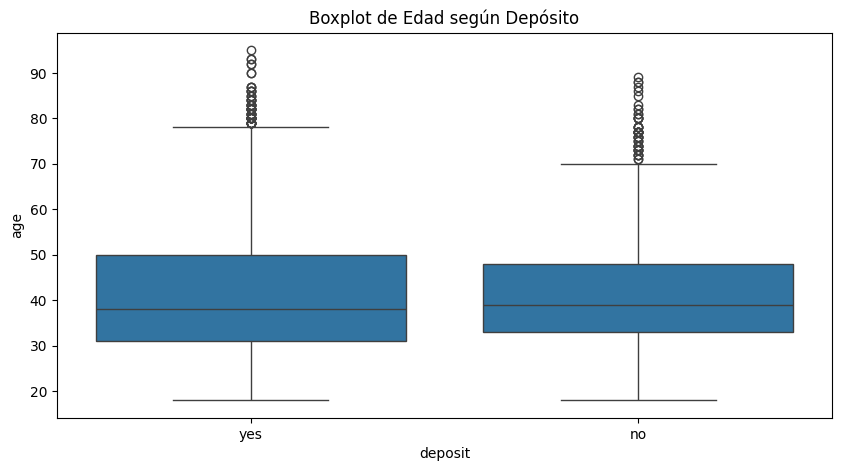

In [6]:
# Gráfico de caja y bigotes (Boxplot)
plt.figure(figsize=(10, 5))
sns.boxplot(data=data, x='deposit', y='age')
plt.title("Boxplot de Edad según Depósito")
plt.show()

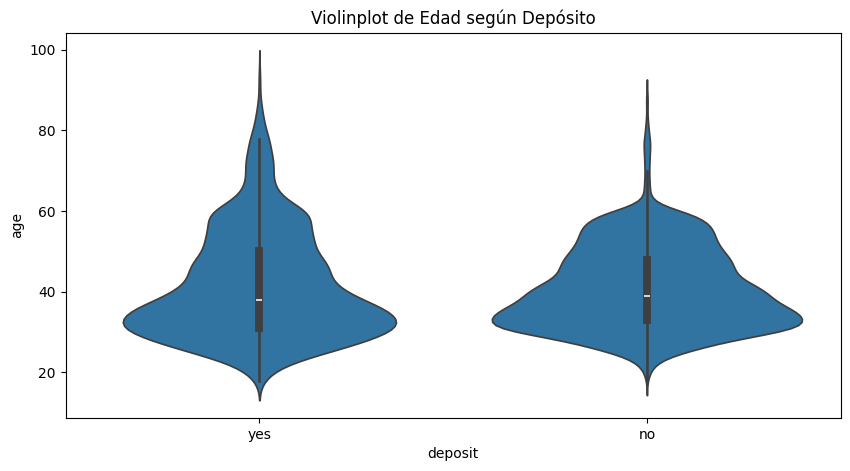

In [7]:
# Gráfico de violín
plt.figure(figsize=(10, 5))
sns.violinplot(data=data, x='deposit', y='age')
plt.title("Violinplot de Edad según Depósito")
plt.show()


In [8]:
# Copia del dataset original
df = data.copy()

# Llenado de valores faltantes (si los hay)
df.fillna(method='ffill', inplace=True)

# Codificación de variables categóricas
df = pd.get_dummies(df, drop_first=True)

# Separación entre variables predictoras y objetivo
X = df.drop('deposit_yes', axis=1) if 'deposit_yes' in df.columns else df.drop('deposit', axis=1)
y = df['deposit_yes'] if 'deposit_yes' in df.columns else df['deposit'].map({'yes': 1, 'no': 0})

# División de los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalado de variables numéricas
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


<ipython-input-8-d445920adfe7>:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df.fillna(method='ffill', inplace=True)


In [9]:
# Inicializar los modelos
logistic_model = LogisticRegression(random_state=42)
decision_tree_model = DecisionTreeClassifier(random_state=42)

# Entrenar los modelos
logistic_model.fit(X_train, y_train)
decision_tree_model.fit(X_train, y_train)



DecisionTreeClassifier(random_state=42)

In [10]:
# Predicciones
logistic_pred = logistic_model.predict(X_test)
tree_pred = decision_tree_model.predict(X_test)

# Precisión
print(f"Precisión Regresión Logística: {accuracy_score(y_test, logistic_pred):.4f}")
print(f"Precisión Árbol de Decisión: {accuracy_score(y_test, tree_pred):.4f}")

Precisión Regresión Logística: 0.8146
Precisión Árbol de Decisión: 0.7841


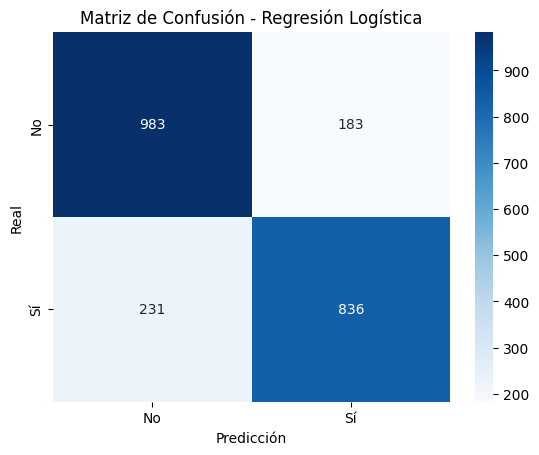

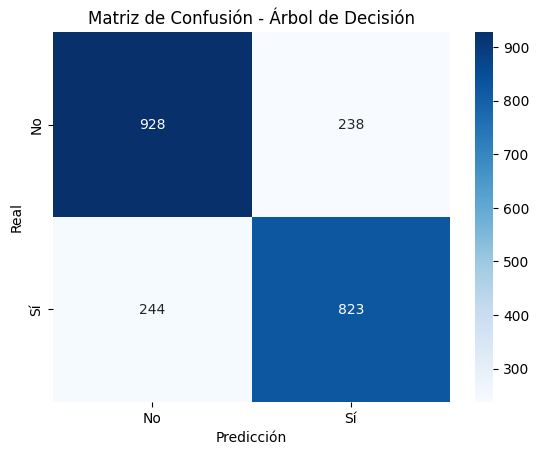

In [12]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=['No', 'Sí'],
                yticklabels=['No', 'Sí'])
    plt.xlabel('Predicción')
    plt.ylabel('Real')
    plt.title(title)
    plt.show()
plot_confusion_matrix(y_test, logistic_pred, "Matriz de Confusión - Regresión Logística")
plot_confusion_matrix(y_test, tree_pred, "Matriz de Confusión - Árbol de Decisión")

In [13]:
print("Reporte de Clasificación - Regresión Logística")
print(classification_report(y_test, logistic_pred))

print("Reporte de Clasificación - Árbol de Decisión")
print(classification_report(y_test, tree_pred))

Reporte de Clasificación - Regresión Logística
              precision    recall  f1-score   support

       False       0.81      0.84      0.83      1166
        True       0.82      0.78      0.80      1067

    accuracy                           0.81      2233
   macro avg       0.82      0.81      0.81      2233
weighted avg       0.81      0.81      0.81      2233

Reporte de Clasificación - Árbol de Decisión
              precision    recall  f1-score   support

       False       0.79      0.80      0.79      1166
        True       0.78      0.77      0.77      1067

    accuracy                           0.78      2233
   macro avg       0.78      0.78      0.78      2233
weighted avg       0.78      0.78      0.78      2233

